In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
#import spicy as sp
import pandas as pd
import sklearn
#import MrJob
import numpy as np
import pandas as pd
import requests
import io
import zipfile
import scipy.stats
from matplotlib import rcParams
#from pattern import web
from fnmatch import fnmatch
from math import *
from pylab import *
from scipy.optimize import brentq
from scipy.misc import derivative
from scipy.integrate import simps
from scipy.integrate import quad
from scipy.integrate import odeint

In [4]:
#converts to an array so that it can be used in array calculation later
def FreeFall(state, time):
    g0=state[1]
    g1=-9.8
    return np.array([g0,g1])

In [9]:
# Def euler; calculates next state from current 
def euler(y,t,dt,derivs):
    y_next=y+derivs(y,t)*dt
    return y_next

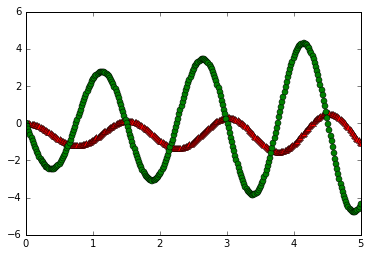

In [26]:
# Euler method for ODE, SHO using arrays
# Euler method has errors, increase tau and error inc exponentially,
# so Runge-Kutta is the sol.
N=300 #No. of steps
x0=0.0;v0=0.0
tau=5.0 #Total time for simulation
dt=tau/float(N-1)
k=3.5;m=0.2;g=9.8
time=linspace(0,tau,N)
y=zeros([N,2])
y[0,0]=x0
y[0,1]=v0
def SHO(state, time):
    g0=state[1]
    g1=(-k/m)*state[0]-g
    return array([g0,g1])

for j in range(N-1):
    y[j+1]=euler(y[j],time[j],dt,SHO)
    
xdata=[y[j,0] for j in range(N)]
vdata=[y[j,1] for j in range(N)]

plt.plot(time,xdata,'r^')
plt.plot(time,vdata,'go')

In [45]:
# Define rk2; finds next state from current state 
def rk2(y,time,dt,derivs):
    k0=dt*derivs(y,time)
    k1=dt*derivs(y+k0,time+dt)
    y_next=y+0.5*(k0+k1)
    return y_next

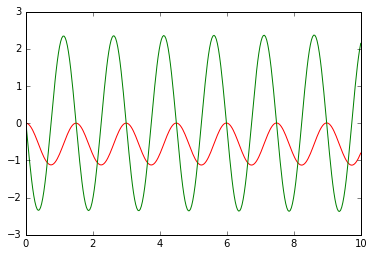

In [31]:
#Same SHO as above but with rk2, big improvement, just replace rk2 by rk4 if
#you have defined rk4.
N=300 #No. of steps
x0=0.0;v0=0.0
tau=10.0 #Total time for simulation
dt=tau/float(N-1)
k=3.5;m=0.2;g=9.8
time=linspace(0,tau,N)
y=zeros([N,2])
y[0,0]=x0
y[0,1]=v0
# Define the diff eq.
def SHO(state, time):
    g0=state[1]
    g1=(-k/m)*state[0]-g
    return array([g0,g1])
#Get the next state using a num routine
for j in range(N-1):
    y[j+1]=rk2(y[j],time[j],dt,SHO)
    
xdata=[y[j,0] for j in range(N)]
vdata=[y[j,1] for j in range(N)]

plt.plot(time,xdata,'r-')
plt.plot(time,vdata,'g-')

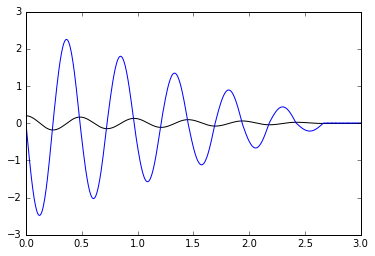

In [36]:
# Script for solving ODE for horizontal spring/mass system

N=500; x0=0.2; v0=0.0; tau=3.0; k=42.0; m=0.25; g=9.8; mu=0.15
dt=tau/float(N-1)
y=zeros([N,2]) # Defines a N by 2 matrix with all elements being zero
y[0,0]=x0
y[0,1]=v0
# Define diff equation
def SpringMass(state, time):
    g0=state[1] # state[0] or [1] here means y[0](position) or y[1](velocity)
    if g0>0: # If +ve velocity
        g1=(-k/m)*state[0]-g*mu
    else: # If -ve velocity
        g1=(-k/m)*state[0]+g*mu
    return array([g0,g1]) # gives an array of vel and accel
#Call rk2 solver
for j in range(N-1):
    y[j+1]=rk2(y[j],0,dt,SpringMass) # finds next position
# Plot
time=linspace(0,tau,N)
plt.plot(time, y[:,0],'k-') # plot position vs time
plt.plot(time, y[:,1],'b-') # plot vel vs time

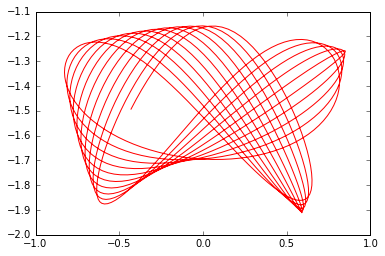

In [41]:
N=1000
y=zeros([4])
L0=1.0 #unstreached spring length
L=1.0 #Initial streach of spring
V0=0.0;#Initial vel
theta0=0.3;omega0=0.0
k=3.5;m=0.2;g=9.8
y[0]=L;y[1]=V0;y[2]=theta0;y[3]=omega0

time= np.linspace(0,25,N)

def springpen(y, time):
    g0=y[1]
    g1=(L0+y[0])*y[3]*y[3]-(k/m)*y[0]+g*cos(y[2])
    g2=y[3]
    g3=-((1/(L0+y[0]))*(g*sin(y[2])+2*y[1]*y[3]))
    return array([g0,g1,g2,g3])

answer=odeint(springpen,y,time)

xdata=(L0+answer[:,0])*sin(answer[:,2])
ydata=-(L0+answer[:,0])*cos(answer[:,2])

plt.plot(xdata,ydata,'r-')

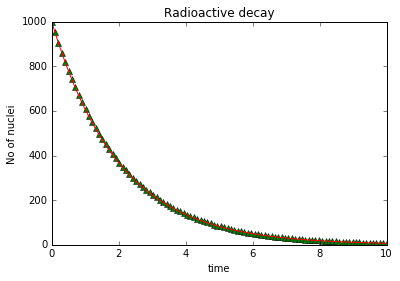

In [54]:
# prob-0
lambd=0.5; dt=0.1; tmax=10; N=1000; steps=int(tmax/dt)
dn=zeros(steps)
dn[0]=N
def rad_decay(N,t):
    dn=-lambd*N
    return dn    
for i in range(steps-1):
    dn[i+1]=rk2(dn[i],tmax,dt,rad_decay)
t=np.linspace(0,tmax,100)
exact=N*exp(-lambd*t)
plt.plot(t,dn,'g^',label='calculated')
plt.plot(t,exact,'r-',label='exact')
plt.xlabel('time')
plt.ylabel('No of nuclei')
plt.title('Radioactive decay')

In [69]:
# Prob 5 ... cann't figure out a step !! 
lambd=0.5; dt=0.1; tmax=10; N1=1000; lambd2=0.3; steps=int(tmax/dt)
dn=zeros(steps)
dn2=zeros(steps)
dn[0]=N1
def rad_decay(N1,t):
    dn=-lambd*N1
    return dn    
for i in range(steps-1):
    dn[i+1]=rk2(dn[i],tmax,dt,rad_decay)
    dn2[i]=dn[i+1]
t=np.linspace(0,tmax,100)
#plt.plot(t,dn,'g^',label='calculated')
def rad_decay2(N2,t):
    dn=-lambd2*N2+lambd*dn[i]
    return dn
for i in range(steps-1):
    dn2[i+1]=rk2(dn2[i],tmax,dt,rad_decay2)
plt.plot(dn2)
plt.plot(dn)

UnboundLocalError: local variable 'dn' referenced before assignment